In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import scipy.integrate as integrate

# Fitujemy zrzut pręta PB3

In [20]:
czas = df_zrzut_zuza["Czas, s"].to_numpy()-0.2444
zagłębienie = df_zrzut_zuza["Zagłębienie, cm"].to_numpy()
D_zagłębienie = df_zrzut_zuza["Dzagłębienie, cm"].to_numpy()

NameError: name 'df_zrzut_zuza' is not defined

Do danych eksperymentalnych z pomiaru spadku pręta nie pasuje krzywa Ricattiego \(swobodny spadek ciała w ośrodku z tłumieniem.

Nie pasuje też przetłumiony oscylator (1-exp(at)).

Najbardzie pasuje "kapelusz" = prosta + fragment paraboli + stała

In [ ]:
def parabola(t, a, b):
    return a*t**2+b*t

In [ ]:
t = np.linspace(0, max(czas), num = 100)

popt, pcov = curve_fit(parabola, czas[60:], zagłębienie[60:]/100, sigma = 0.01, p0=[1,1])
popt, pcov 

(array([-2.95366438,  3.57612455]),
 array([[ 0.00048409, -0.00021537],
        [-0.00021537,  0.00010185]]))

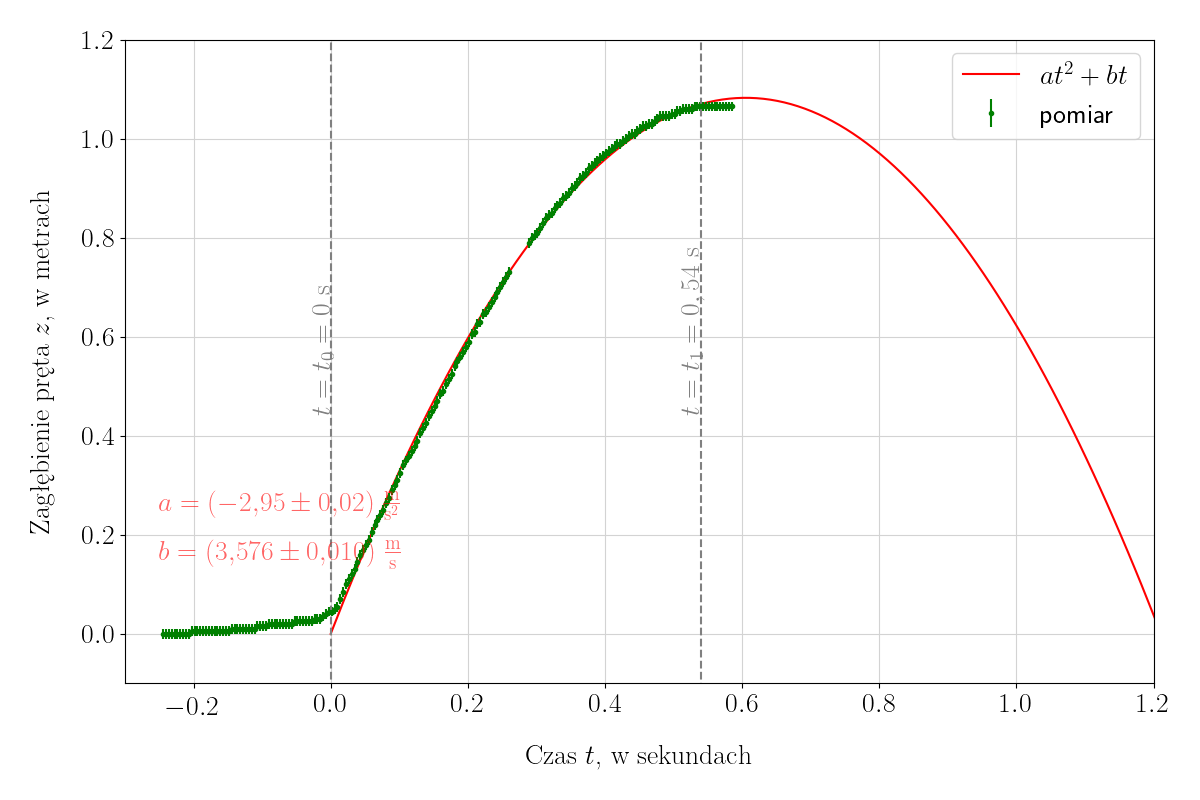

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})
plt.rc('axes', labelsize=20)
plt.rcParams.update({
    'font.size': 20,
    'text.usetex': True,
    'text.latex.preamble': r'''
        \usepackage[bb=boondox]{mathalfa}
        \usepackage[polish]{babel}
        \usepackage[utf8]{inputenc}
        \usepackage{polski}'''
})

ax.plot(t, parabola(t, *popt), label = '$at^2+bt$', color='red')
ax.errorbar(czas, zagłębienie/100, yerr=0.01, fmt='.', color='green', label = 'pomiar',alpha=1)

plt.annotate(r'$a=(-2,\!95\pm 0,\!02)\ \frac{\mathrm{m}}{\mathrm{s}^2}$', (-0.25, 0.25), color = 'red', alpha = 0.6)
plt.annotate(r'$b=(3,\!576\pm 0,\!010)\ \frac{\mathrm{m}}{\mathrm{s}}$', (-0.25, 0.15), color = 'red', alpha = 0.6)


ax.set_xlabel("\\rmfamily{Czas  $t$, w sekundach}")
ax.set_ylabel("\\rmfamily{Zagłębienie pręta $z$, w metrach}")
ax.grid(color='lightgray')

ax.plot((0, 0), (-2, 2), '--', color='gray')
ax.plot((0.54, 0.54), (-2, 2), '--', color='gray')
ax.annotate('$t=t_0=0$ \\rmfamily{s}', (-0.03, 0.45), color = 'gray', rotation = 90)
ax.annotate('$t=t_1=0,54$ \\rmfamily{s}', (0.51, 0.45), color = 'gray', rotation = 90)

ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 20

ax.set_ylim(-0.1, 1.2)
ax.set_xlim(-0.3, 1.2)

# plt.xticks([])
# plt.yticks([])
fig.tight_layout()
ax.legend()
# fig

# Ostateczna postać $\rho_{\$}(t)$, otrzymana na drodze $\varrho(z(t))$

Z powyższych rozważań otrzymaliśmy:

$$  \rho_{\$}(t) =
    \begin{cases}
      \frac{\rho_{pom}}{\varrho_{max}}\cdot \frac{H}{\pi}\left[sin\left(\frac{\pi\cdot z(t)}{H}\right)-sin\left(\frac{\pi\cdot (z(t)-L)}{H}\right)\right] & \mathrm{dla} \  \frac{L}{2} \leq z < \frac{H}{2} \\
     \frac{\rho_{pom}}{\varrho_{max}} \cdot \frac{H}{\pi}\left[1-sin\left(\frac{\pi\cdot (z(t)-L)}{H}\right)\right] & \mathrm{dla}\  \frac{H}{2} \leq z < \frac{H}{2}+L \\
     0 & \mathrm{dla} \  \frac{H}{2}+L \leq z < +\infty \\
    \end{cases} $$

gdzie:

$$ z(t)=at^2+bt $$

dla:

$H=1,3\ \mathrm{m}$,

$L=1\ \mathrm{m}$,

$\varrho_{max}=2\frac{H}{\pi}sin\left(\frac{\pi L}{2H}\right)$,

$a=(-2,\!95\pm 0,\!02)\ \frac{\mathrm{m}}{\mathrm{s}^2}$, 

$b=(3,\!576\pm 0,\!010)\ \frac{\mathrm{m}}{\mathrm{s}}$.


Rysujemy $\rho_{\$}(t)$ od urwanego pręta, czyli od momentu $\frac{L}{2} \leq z$

In [ ]:
def zet_od_te(t, L, a=-2.95, b=3.576, t1=0.54):
    z0 = L/2     # warunek początkowy, bo pręt był zanurzony do z0, gdy zaczął się urywać
    wynik = np.where(t>t1, a*t1**2+b*t1+z0, a*t**2+b*t+z0 )
    return wynik

# def te_od_zet(z, L, a=-2.95, b=3.576, t1=0.54):
#     z0 = L/2     # warunek początkowy, bo pręt był zanurzony do z0, gdy zaczął się urywać
#     Delta = b*b+4*a*z
#     wynik = np.where(
#     return (-b+np.sqrt(Delta))/(2*a)

def sinus_z(z, H, L):
    return np.sin(np.pi*z/H)

def sinus_zL(z, H, L):
    return np.sin(np.pi*(z-L)/H)

def r1(z, H, L, rpom):
    rmax = 2*(H/np.pi)*np.sin(np.pi*L/(2*H))
    A = (rpom/rmax)*(H/np.pi)
    return rpom-A*(sinus_z(z, H, L)-sinus_zL(z, H, L))

def r2(z, H, L, rpom):
    rmax = 2*(H/np.pi)*np.sin(np.pi*L/(2*H))
    A = (rpom/rmax)*(H/np.pi)
    return rpom-A*(1-sinus_zL(z, H, L))

def r3(z, H, L, rpom):
    return rpom

def ro_od_zet(z, H, L, rpom):
    wynik = np.where(z<H/2, r1(z, H, L, rpom), r2(z, H, L, rpom))
    wynik = np.where(z<(H/2+L), wynik, r3(z, H, L, rpom))
    return wynik

def ro_od_te(t, H, L, rpom):
    return ro_od_zet(zet_od_te(t, L), H, L, rpom)

USTAWIAMY PARAMETRY:

In [ ]:
L = 1
H = 1.3
t = np.linspace(0, 5, 500)     # w sekundach
t0 = 10                        # w sekundach
z = zet_od_te(t, L)
rpom = 1
rt = ro_od_te(t, H, L, rpom)

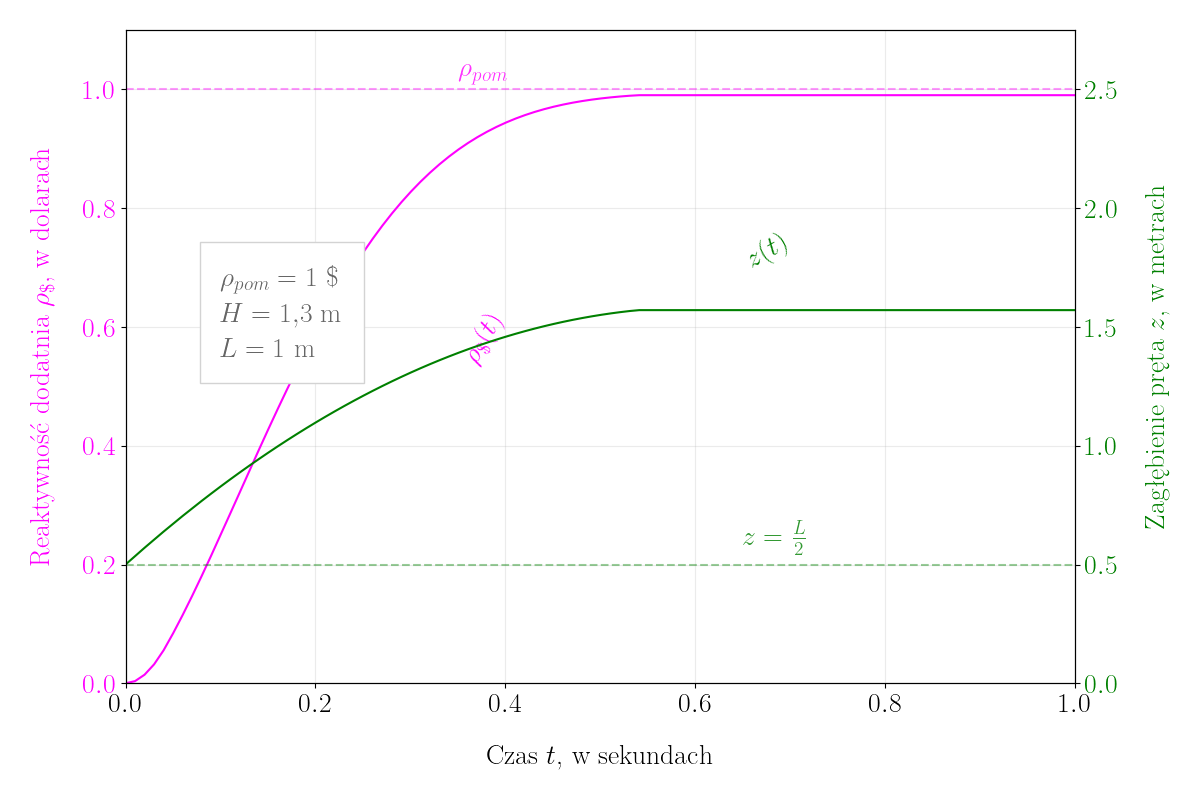

In [ ]:
fig, ax2 = plt.subplots(figsize=(12, 8))
plt.rcParams.update({'font.size': 20})
plt.rc('axes', labelsize=20)
plt.rcParams.update({
    'font.size': 20,
    'text.usetex': True,
    'text.latex.preamble': r'''
        \usepackage[bb=boondox]{mathalfa}
        \usepackage[polish]{babel}
        \usepackage[utf8]{inputenc}
        \usepackage{polski}'''
})

ax1 = ax2.twinx()

ax1.plot(t, z,  color='green', label = '$z(t)$')
ax1.plot((0,5), (L/2, L/2), '--', color='green', alpha = 0.4, label = '$L/2$')


ax2.set_xlabel("\\rmfamily{Czas  $t$, w sekundach}")
ax1.set_ylabel("\\rmfamily{Zagłębienie pręta $z$, w metrach}", color = 'green')
ax2.set_ylabel("\\rmfamily{Reaktywność dodatnia $\\rho_{\\$}$, w dolarach}", color = 'magenta')

ax2.annotate('$\\rho_{pom}$', (0.35, 1.02), color = 'magenta', alpha = 0.8)
ax2.annotate('$\\rho_{\\$}(t)$', (0.35, 0.54), color = 'magenta', alpha = 1, rotation = 60)
ax1.annotate('$z(t)$', (0.65, 1.75), color = 'green', alpha = 1, rotation = 30)
ax1.annotate('$z=\\frac{L}{2}$', (0.65, 0.58), color = 'green', alpha = 0.8)

ax2.plot(t, rt, color='magenta', label = '$z(t)$')
ax2.plot((0,5), (rpom, rpom), '--', color='magenta', alpha = 0.4, label = '$L/2$')

text = """$\\rho_{pom}=1 \\ \\$$
    $H=1,\\!3 \\ \\mathrm{m}$
$L=1 \\ \\mathrm{m}$"""

ax2.annotate(text, (0.10, 0.55), color = 'black', alpha = 0.6, linespacing = 1.5,
             bbox=dict(
                facecolor = 'white',
                edgecolor = 'lightgray',
                pad=15,
             ))


ax1.tick_params(axis='y', labelcolor='green')
ax2.tick_params(axis='y', labelcolor='magenta')
#ax1.legend(loc = 'center left')
ax1.yaxis.labelpad = 20
ax2.yaxis.labelpad = 20
ax2.xaxis.labelpad = 20

ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1.1*5/2)
ax2.set_ylim(0, 1.1)

# plt.xticks([])
# plt.yticks([])
ax2.grid(alpha=0.25)
fig.tight_layout()
# fig